In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma
import netCDF4 as nc
import cmocean.cm as cm 
from IPython.display import display, Math, Latex
import matplotlib.gridspec as gridspec
import matplotlib.dates as mdates
from scipy.io import loadmat
from scipy.interpolate import griddata
from dateutil.parser import parse
from salishsea_tools import geo_tools, viz_tools, tidetools, nc_tools

%matplotlib inline

/home/ssahu/anaconda3/lib/python3.5/site-packages/xarray/conventions.py:9: FutureWarning: The pandas.tslib module is deprecated and will be removed in a future version.
  from pandas.tslib import OutOfBoundsDatetime


### A couple of spatial subplots to see the overall run results in temperature or salinity

In [2]:
!pwd

/ocean/ssahu/CANYONS/wcvi/analysis_saurav_wcvi


In [3]:
tracers = nc.Dataset('/ocean/ssahu/CANYONS/Results/ORCINUS_RESULTS/no_bdy_changed_grid/WCVI_1h_20160402_20160509_grid_T.nc')

bathy = '/ocean/ssahu/CANYONS/wcvi/grid/bathy_meter.nc'

In [4]:
ssh = tracers.variables['sossheig'][:]
lats = tracers.variables['nav_lat'][:]
lons = tracers.variables['nav_lon'][:]
sal = tracers.variables['vosaline'][:]

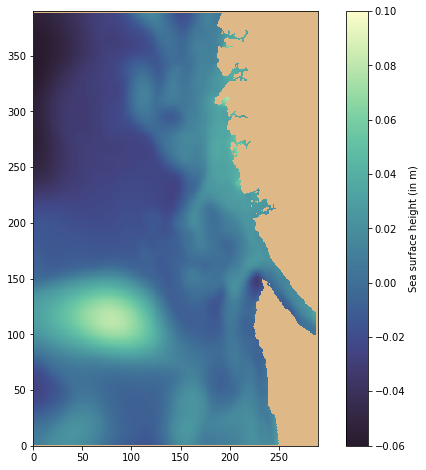

In [5]:
ssh0 = np.ma.masked_values(ssh[0], 0)  #for higher accuracy masking should always be done from bathymetry and not from ssh data
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(ssh0)
cmap = plt.get_cmap(cm.deep_r)
cmap.set_bad('burlywood')
mesh = ax.pcolormesh(ssh0, cmap=cmap, vmax = 0.1)
cbar = fig.colorbar(mesh)
cbar.set_label('Sea surface height (in m)')

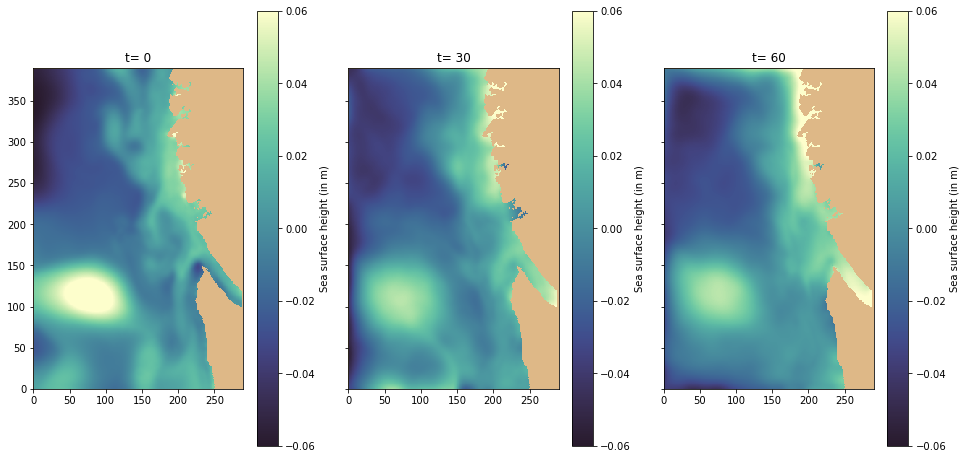

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(16, 8), sharey=True)
cmap = plt.get_cmap('jet')
cmap.set_bad('burlywood')

time_steps = (0, 30, 60)
for ax, t in zip(axs, time_steps):
    ssh_t = np.ma.masked_equal(ssh[t], 0)
    cmap = plt.get_cmap(cm.deep_r)
    cmap.set_bad('burlywood')
    viz_tools.set_aspect(ax)
    mesh = ax.pcolormesh(ssh_t, cmap=cmap, vmin = -0.06, vmax=0.06)
    ax.set_title('t= {0}'.format(t))
    cbar = fig.colorbar(mesh, ax=ax)
    cbar.set_label('Sea surface height (in m)')

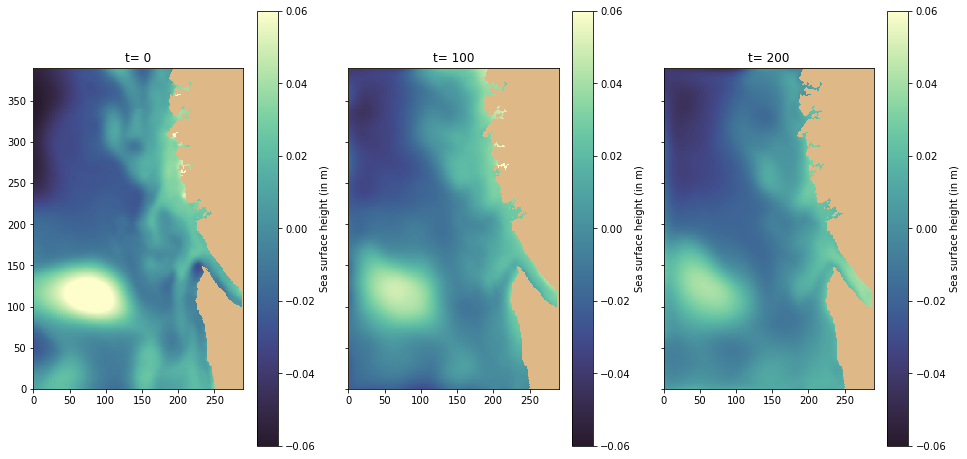

In [7]:


fig, axs = plt.subplots(1, 3, figsize=(16, 8), sharey=True)
cmap = plt.get_cmap('jet')
cmap.set_bad('burlywood')

time_steps = (0, 100, 200)
for ax, t in zip(axs, time_steps):
    ssh_t = np.ma.masked_equal(ssh[t], 0)
    cmap = plt.get_cmap(cm.deep_r)
    cmap.set_bad('burlywood')
    viz_tools.set_aspect(ax)
    mesh = ax.pcolormesh(ssh_t, cmap=cmap, vmin = -0.06, vmax=0.06)
    ax.set_title('t= {0}'.format(t))
    cbar = fig.colorbar(mesh, ax=ax)
    cbar.set_label('Sea surface height (in m)')



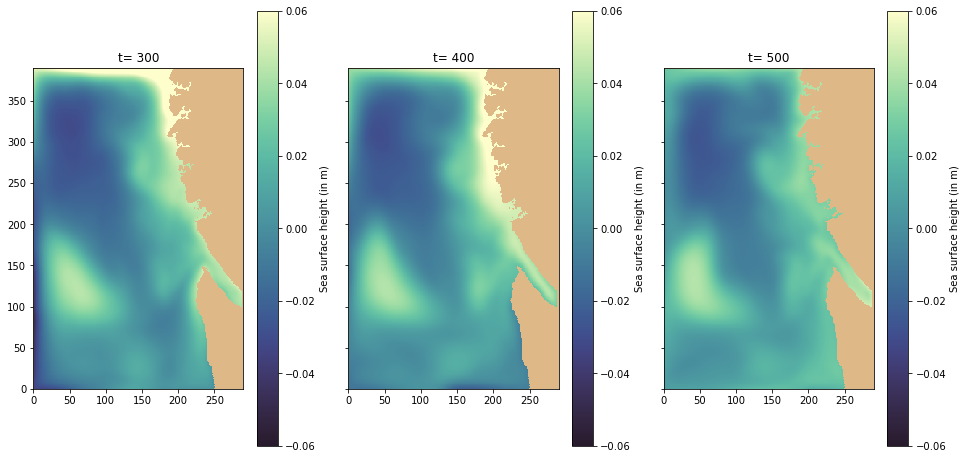

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(16, 8), sharey=True)
cmap = plt.get_cmap('jet')
cmap.set_bad('burlywood')

time_steps = (300, 400, 500)
for ax, t in zip(axs, time_steps):
    ssh_t = np.ma.masked_equal(ssh[t], 0)
    cmap = plt.get_cmap(cm.deep_r)
    cmap.set_bad('burlywood')
    viz_tools.set_aspect(ax)
    mesh = ax.pcolormesh(ssh_t, cmap=cmap, vmin = -0.06, vmax=0.06)
    ax.set_title('t= {0}'.format(t))
    cbar = fig.colorbar(mesh, ax=ax)
    cbar.set_label('Sea surface height (in m)')

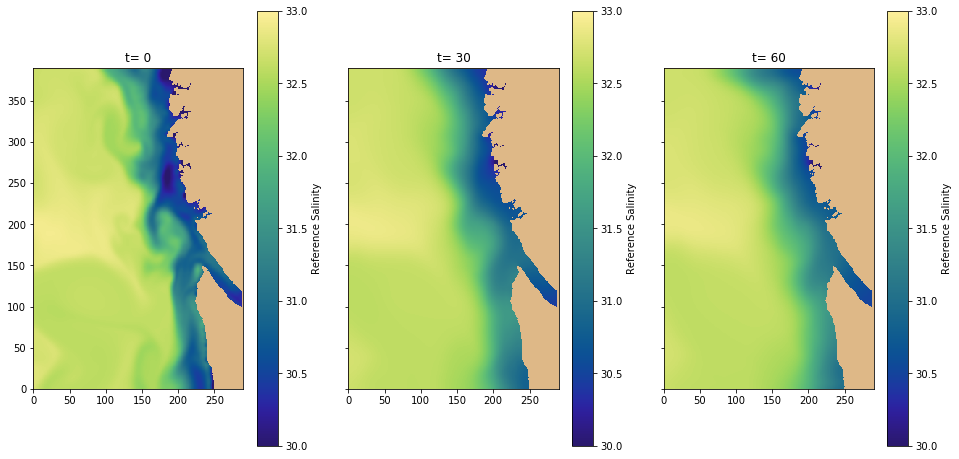

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(16, 8), sharey=True)
cmap = plt.get_cmap('jet')
cmap.set_bad('burlywood')

time_steps = (0, 30, 60)
for ax, t in zip(axs, time_steps):
    sal_t = np.ma.masked_equal(sal[t,0,...], 0)
    cmap = plt.get_cmap(cm.haline)
    cmap.set_bad('burlywood')
    viz_tools.set_aspect(ax)
    mesh = ax.pcolormesh(sal_t, cmap=cmap, vmin = 30, vmax =33)
    viz_tools.plot_land_mask(ax, bathy, color='burlywood')
    ax.set_title('t= {0}'.format(t))
    cbar = fig.colorbar(mesh, ax=ax)
    cbar.set_label('Reference Salinity')

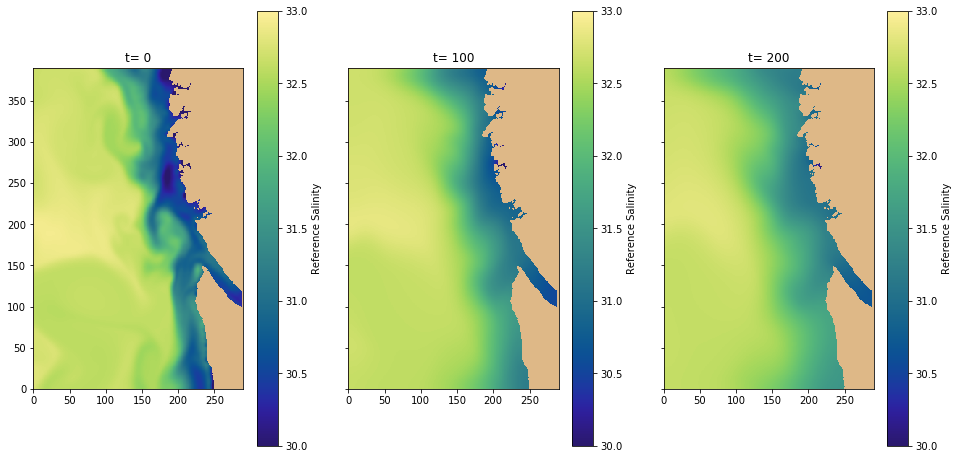

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(16, 8), sharey=True)
cmap = plt.get_cmap('jet')
cmap.set_bad('burlywood')

time_steps = (0, 100, 200)
for ax, t in zip(axs, time_steps):
    sal_t = np.ma.masked_equal(sal[t,0,...], 0)
    cmap = plt.get_cmap(cm.haline)
    cmap.set_bad('burlywood')
    viz_tools.set_aspect(ax)
    mesh = ax.pcolormesh(sal_t, cmap=cmap, vmin = 30, vmax =33)
    viz_tools.plot_land_mask(ax, bathy, color='burlywood')
    ax.set_title('t= {0}'.format(t))
    cbar = fig.colorbar(mesh, ax=ax)
    cbar.set_label('Reference Salinity')

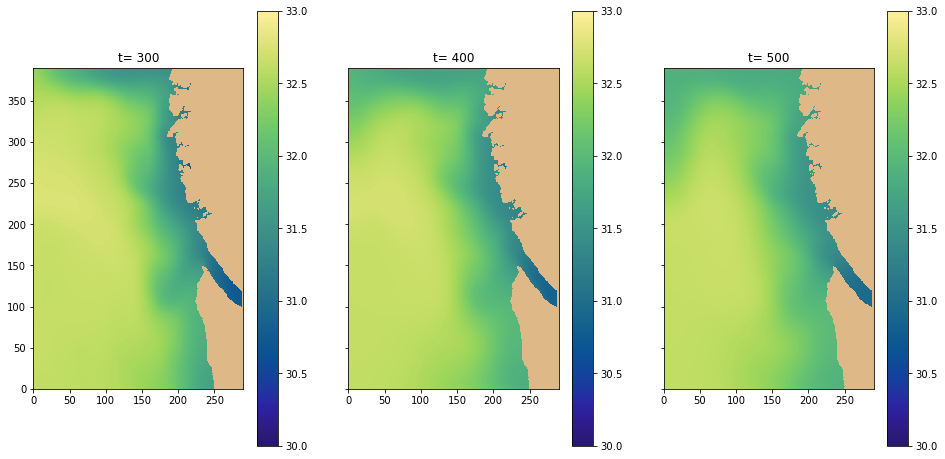

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(16, 8), sharey=True)

time_steps = (300, 400, 500)
for ax, t in zip(axs, time_steps):
    sal_t = np.ma.masked_equal(sal[t,0,...], 0)
    cmap = plt.get_cmap(cm.haline)
    cmap.set_bad('burlywood')
    viz_tools.set_aspect(ax)
    mesh = ax.pcolormesh(sal_t, cmap=cmap, vmin = 30, vmax =33)
    viz_tools.plot_land_mask(ax, bathy, color='burlywood')
    ax.set_title('t= {0}'.format(t))
    cbar = fig.colorbar(mesh, ax=ax)

### 1) LOOK at THE SURFACE AND SHELF BREAK CURRENTS WITH THE WINDS DO THEY FOLLOW THE PHYSICS

In [13]:


u_vel = nc.Dataset('/ocean/ssahu/CANYONS/Results/ORCINUS_RESULTS/no_bdy_changed_grid/WCVI_1h_20160402_20160509_grid_U.nc')
v_vel = nc.Dataset('/ocean/ssahu/CANYONS/Results/ORCINUS_RESULTS/no_bdy_changed_grid/WCVI_1h_20160402_20160509_grid_V.nc')
# w_vel = nc.Dataset('/ocean/ssahu/CANYONS/Results/ORCINUS_RESULTS/no_bdy_changed_grid/WCVI_1h_20160402_20160509_grid_W.nc')

bathy = '/ocean/ssahu/CANYONS/wcvi/grid/bathy_meter.nc'



ugrid = u_vel.variables['vozocrtx']
vgrid = v_vel.variables['vomecrty']
zlevels = u_vel.variables['depthu']
timesteps = u_vel.variables['time_counter']
lat = u_vel.variables['nav_lat']
lon = u_vel.variables['nav_lon']



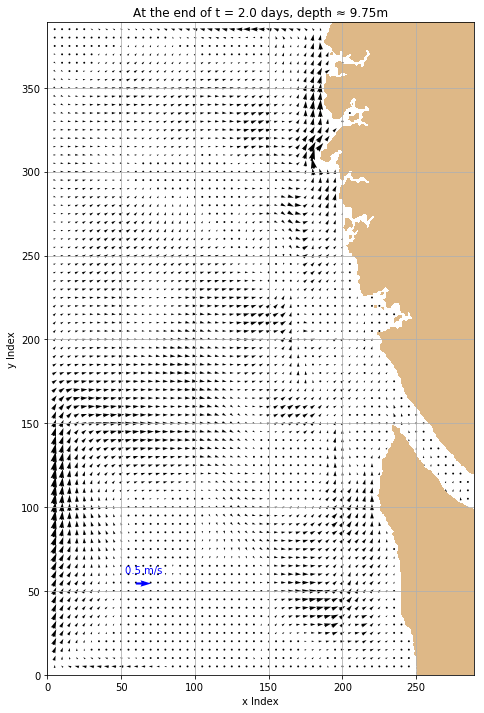

In [19]:
# Define the slice to plot
t, zlevel = 47 , 0
y_slice = np.arange(0, 390)
x_slice = np.arange(0, 290)
# Slice and mask the arrays
ugrid_tzyx = np.ma.masked_values(ugrid[t, zlevel, y_slice, x_slice], 0)
vgrid_tzyx = np.ma.masked_values(vgrid[t, zlevel, y_slice, x_slice], 0)
# "Unstagger" the velocity values by interpolating them to the T-grid points
u_tzyx, v_tzyx = viz_tools.unstagger(ugrid_tzyx, vgrid_tzyx)
speeds = np.sqrt(np.square(u_tzyx) + np.square(v_tzyx))


arrow_step = 5
y_slice_a = y_slice[::arrow_step]
x_slice_a = x_slice[::arrow_step]


# Plot the velocity vectors
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
viz_tools.set_aspect(ax)
quiver = ax.quiver(x_slice_a[:], y_slice_a[:], u_tzyx[::5,::5], v_tzyx[::5,::5] ,pivot='mid', cmap='Reds', width=0.005)
viz_tools.plot_land_mask(ax, bathy , xslice=x_slice, yslice=y_slice, color='burlywood')
# Axes limits and grid
ax.set_xlim(x_slice[0], x_slice[-1])
ax.set_ylim(y_slice[0], y_slice[-1])
ax.grid()
# Axes label and title
ax.set_xlabel('x Index')
ax.set_ylabel('y Index')
ax.set_title('At the end of t = {0} days, depth \u2248 {d:.2f}{z.units}'.format((t+1)/24, d=zlevels[zlevel], z=zlevels))
ax.quiverkey(quiver, 65, 55, 0.5, '0.5 m/s', coordinates='data', color='blue', labelcolor='blue')

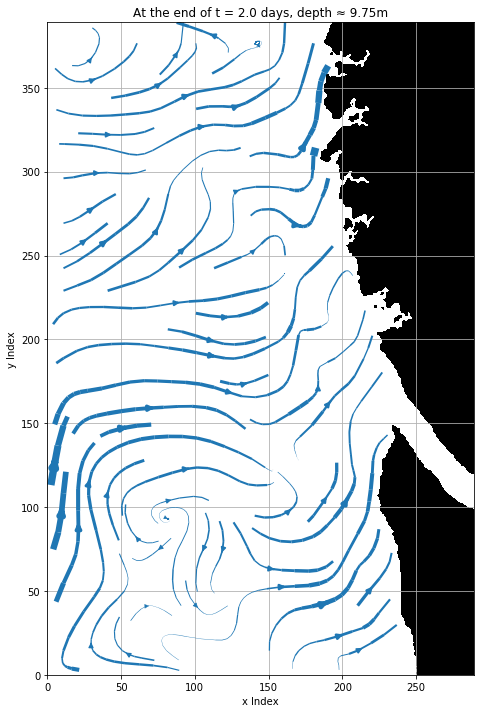

In [20]:
t, zlevel = 47, 0
y_slice = np.arange(0, 390)
x_slice = np.arange(0, 290)

ugrid_tzyx = np.ma.masked_values(ugrid[t, zlevel, y_slice, x_slice], 0)
vgrid_tzyx = np.ma.masked_values(vgrid[t, zlevel, y_slice, x_slice], 0)
u_tzyx, v_tzyx = viz_tools.unstagger(ugrid_tzyx, vgrid_tzyx)
speeds = np.sqrt(np.square(u_tzyx) + np.square(v_tzyx))
max_speed = viz_tools.calc_abs_max(speeds)

fig, ax = plt.subplots(1, 1, figsize=(16, 12))
viz_tools.set_aspect(ax)

ax.streamplot(
    x_slice[1:], y_slice[1:], u_tzyx, v_tzyx,
    linewidth=10*speeds/max_speed,
)
viz_tools.plot_land_mask(ax, bathy, xslice=x_slice, yslice=y_slice)

ax.set_xlim(x_slice[0], x_slice[-1])
ax.set_ylim(y_slice[0], y_slice[-1])
ax.grid()

ax.set_xlabel('x Index')
ax.set_ylabel('y Index')
ax.set_title('At the end of t = {0} days, depth \u2248 {d:.2f}{z.units}'.format((t+1)/24, d=zlevels[zlevel], z=zlevels))

In [21]:
atmos_forcing_file = nc.Dataset('/ocean/ssahu/CANYONS/nemo-forcing/43_days_JP_primitive/ops_y2016m04d03.nc')
bathy = '/ocean/ssahu/CANYONS/wcvi/grid/bathy_meter.nc'



u_wind = atmos_forcing_file.variables['u_wind']
v_wind = atmos_forcing_file.variables['v_wind']
timesteps =u_wind.shape[0]

bathy_file = nc.Dataset(bathy)

lon = bathy_file.variables['nav_lon'][:]
lat = bathy_file.variables['nav_lat'][:]


X = lon.flatten()
Y = lat.flatten()

points = (X[:],Y[:])

big_lon_atmos = atmos_forcing_file.variables['nav_lon'][:]

big_lon = np.empty_like(big_lon_atmos)
big_lon[:] = big_lon_atmos[:] - 360

big_lat = atmos_forcing_file.variables['nav_lat'][:]

X_big = big_lon.flatten()
Y_big = big_lat.flatten()

xi = (X_big[:],Y_big[:])

interp_wind_u = np.empty((u_wind.shape[0], lon.shape[0], lon.shape[1]))
interp_wind_v = np.empty_like(interp_wind_u)

for i in np.arange(u_wind.shape[0]):
    interp_wind_u[i,...] = np.reshape(griddata(xi, u_wind[i,...].flatten(), points, method= 'linear'), lon.shape)
    interp_wind_v[i,...] = np.reshape(griddata(xi, v_wind[i,...].flatten(), points, method= 'linear'), lon.shape)


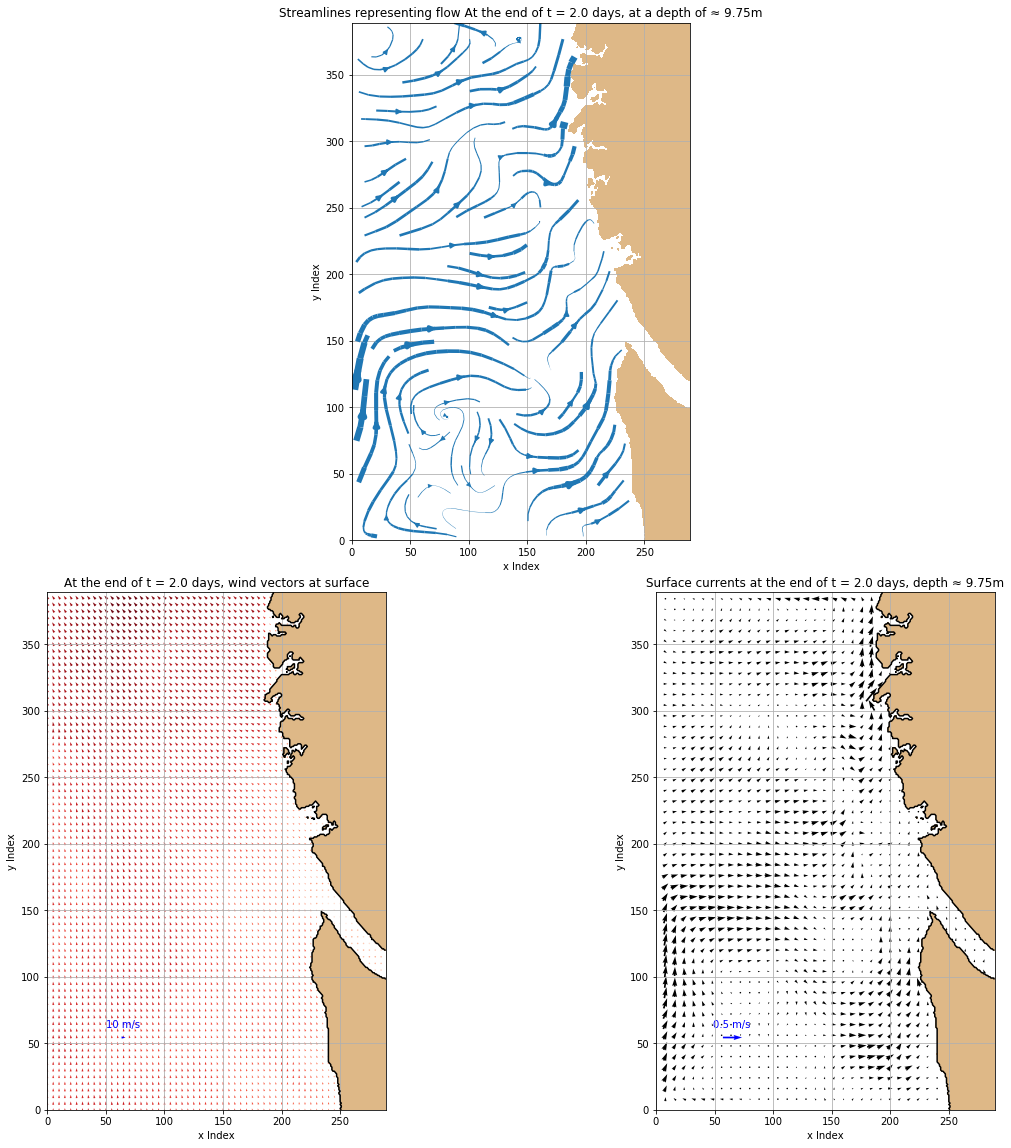

In [28]:
y_slice = np.arange(0, 390)
x_slice = np.arange(0, 290)
t = 23


ax = [0, 0, 0]
# date_NW = parse('2016 May 7 12:00')
# date_SE = parse('2016 Oct 15 12:00')

fig = plt.figure(figsize=(20, 20))

gs = gridspec.GridSpec(2, 2)
gs.update(hspace=0.1)

ax[0] = plt.subplot(gs[0,:])
ax[1] = plt.subplot(gs[1:, 0])
ax[2] = plt.subplot(gs[1:, 1])
# Slice and mask the arrays
# ugrid_tzyx = np.ma.masked_values(interp_wind_u[:, :], 0)
# vgrid_tzyx = np.ma.masked_values(interp_wind_v[:, :], 0)
# "Unstagger" the velocity values by interpolating them to the T-grid points
u_tzyx_wind, v_tzyx_wind = viz_tools.unstagger(interp_wind_u[t,...], interp_wind_v[t,...])
speeds_wind = np.sqrt(np.square(u_tzyx_wind) + np.square(v_tzyx_wind))


arrow_step = 5
y_slice_a = y_slice[::arrow_step]
x_slice_a = x_slice[::arrow_step]


X,Y = np.meshgrid(x_slice_a,y_slice_a)

# Plot the velocity vectors

# fig, ax = plt.subplots(1, 1, figsize=(16, 12))
viz_tools.set_aspect(ax[1])
quiver = ax[1].quiver(X, Y, u_tzyx_wind[::arrow_step,::arrow_step], v_tzyx_wind[::arrow_step,::arrow_step], speeds_wind[::arrow_step,::arrow_step] ,pivot='mid', cmap='Reds', width=0.005)
viz_tools.plot_land_mask(ax[1], bathy , xslice=x_slice, yslice=y_slice, color='burlywood')
viz_tools.plot_coastline(ax[1], bathy)

# Axes limits and grid
ax[1].set_xlim(x_slice[0], x_slice[-1])
ax[1].set_ylim(y_slice[0], y_slice[-1])
ax[1].grid()
# Axes label and title
ax[1].set_xlabel('x Index')
ax[1].set_ylabel('y Index')
ax[1].set_title('At the end of t = {0} days, wind vectors at surface'.format((t+1+24)/24))
ax[1].quiverkey(quiver, 65, 55, 10, '10 m/s', coordinates='data', color='blue', labelcolor='blue')


# Define the slice to plot
zlevel =  0

# Slice and mask the arrays
ugrid_tzyx = np.ma.masked_values(ugrid[t+24, zlevel, y_slice, x_slice], 0)
vgrid_tzyx = np.ma.masked_values(vgrid[t+24, zlevel, y_slice, x_slice], 0)
# "Unstagger" the velocity values by interpolating them to the T-grid points
u_tzyx, v_tzyx = viz_tools.unstagger(ugrid_tzyx, vgrid_tzyx)
speeds = np.sqrt(np.square(u_tzyx) + np.square(v_tzyx))


arrow_step = 8
y_slice_a = y_slice[::arrow_step]
x_slice_a = x_slice[::arrow_step]


# Plot the velocity vectors
# fig, ax[1] = plt.subplots(1, 1, figsize=(16, 12))
viz_tools.set_aspect(ax[2])
quiver = ax[2].quiver(x_slice_a[:], y_slice_a[:], u_tzyx[::8,::8], v_tzyx[::8,::8] ,pivot='mid', cmap='Reds', width=0.005)
viz_tools.plot_land_mask(ax[2], bathy , xslice=x_slice, yslice=y_slice, color='burlywood')
viz_tools.plot_coastline(ax[2], bathy)
# Axes limits and grid
ax[2].set_xlim(x_slice[0], x_slice[-1])
ax[2].set_ylim(y_slice[0], y_slice[-1])
ax[2].grid()
# Axes label and title
ax[2].set_xlabel('x Index')
ax[2].set_ylabel('y Index')
ax[2].set_title('Surface currents at the end of t = {0} days, depth \u2248 {d:.2f}{z.units}'.format((t+1+24)/24, d=zlevels[zlevel], z=zlevels))
ax[2].quiverkey(quiver, 65, 55, 0.5, '0.5 m/s', coordinates='data', color='blue', labelcolor='blue')



viz_tools.set_aspect(ax[0])

ax[0].streamplot(
    x_slice[1:], y_slice[1:], u_tzyx, v_tzyx,
    linewidth=10*speeds/max_speed,
)
viz_tools.plot_land_mask(ax[0], bathy, xslice=x_slice, yslice=y_slice, color='burlywood')

ax[0].set_xlim(x_slice[0], x_slice[-1])
ax[0].set_ylim(y_slice[0], y_slice[-1])
ax[0].grid()

ax[0].set_xlabel('x Index')
ax[0].set_ylabel('y Index')
ax[0].set_title('Streamlines representing flow At the end of t = {0} days, at a depth of \u2248 {d:.2f}{z.units}'.format((t+1+24)/24, d=zlevels[zlevel], z=zlevels))


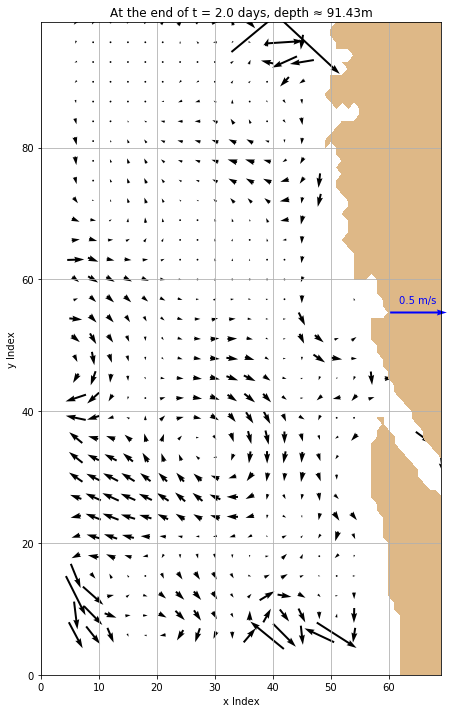

In [17]:
# Define the slice to plot
t, zlevel = 47 , 6
y_slice = np.arange(0, 100)
x_slice = np.arange(0, 70)
# Slice and mask the arrays
ugrid_tzyx = np.ma.masked_values(ugrid[t, zlevel, y_slice, x_slice], 0)
vgrid_tzyx = np.ma.masked_values(vgrid[t, zlevel, y_slice, x_slice], 0)
# "Unstagger" the velocity values by interpolating them to the T-grid points
u_tzyx, v_tzyx = viz_tools.unstagger(ugrid_tzyx, vgrid_tzyx)
speeds = np.sqrt(np.square(u_tzyx) + np.square(v_tzyx))


arrow_step = 3
y_slice_a = y_slice[::arrow_step]
x_slice_a = x_slice[::arrow_step]


# Plot the velocity vectors
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
viz_tools.set_aspect(ax)
quiver = ax.quiver(x_slice_a[1:], y_slice_a[1:], u_tzyx[::3,::3], v_tzyx[::3,::3] ,pivot='mid', cmap='Reds', width=0.005)
viz_tools.plot_land_mask(ax, bathy , xslice=x_slice, yslice=y_slice, color='burlywood')
# Axes limits and grid
ax.set_xlim(x_slice[0], x_slice[-1])
ax.set_ylim(y_slice[0], y_slice[-1])
ax.grid()
# Axes label and title
ax.set_xlabel('x Index')
ax.set_ylabel('y Index')
ax.set_title('At the end of t = {0} days, depth \u2248 {d:.2f}{z.units}'.format((t+1)/24, d=zlevels[zlevel], z=zlevels))
ax.quiverkey(quiver, 65, 55, 0.5, '0.5 m/s', coordinates='data', color='blue', labelcolor='blue')

ValueError: If 'linewidth' is given, must have the shape of 'Grid(x,y)'

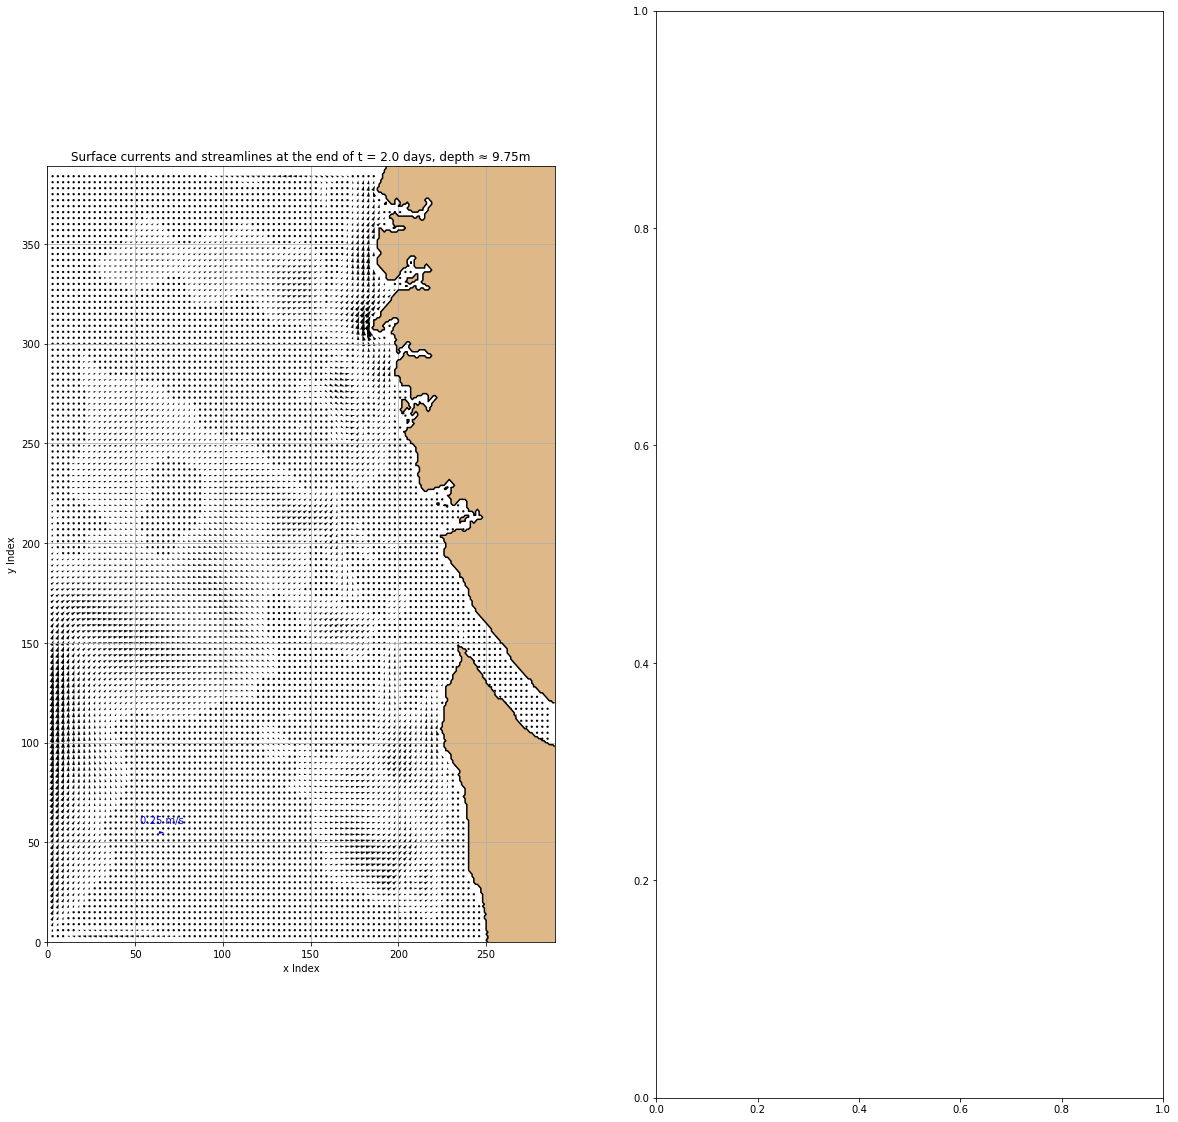

In [32]:
bathy = '/ocean/ssahu/CANYONS/wcvi/grid/bathy_meter.nc'

bathymetry = nc.Dataset(bathy).variables['Bathymetry'][:]

y_slice = np.arange(0, 390)
x_slice = np.arange(0, 290)
t = [0, 47]


ax = [0, 0]
# date_NW = parse('2016 May 7 12:00')
# date_SE = parse('2016 Oct 15 12:00')

fig = plt.figure(figsize=(20, 20))

gs = gridspec.GridSpec(2, 2)
gs.update(hspace=0.1)

# ax[3] = plt.subplot(gs[0:, 1])
ax[1] = plt.subplot(gs[0:, 1])
# ax[2] = plt.subplot(gs[1:, 1])
ax[0] = plt.subplot(gs[0:, 0])
# Slice and mask the arrays
# ugrid_tzyx = np.ma.masked_values(interp_wind_u[:, :], 0)
# vgrid_tzyx = np.ma.masked_values(interp_wind_v[:, :], 0)
# "Unstagger" the velocity values by interpolating them to the T-grid points


# Plot the velocity vectors




# Define the slice to plot
zlevel =  [0, 4]

# Slice and mask the arrays
ugrid_tzyx = np.ma.masked_values(ugrid[t[1], zlevel[0], y_slice, x_slice], 0)
vgrid_tzyx = np.ma.masked_values(vgrid[t[1], zlevel[0], y_slice, x_slice], 0)
# "Unstagger" the velocity values by interpolating them to the T-grid points
u_tzyx, v_tzyx = viz_tools.unstagger(ugrid_tzyx, vgrid_tzyx)
speeds = np.sqrt(np.square(u_tzyx) + np.square(v_tzyx))


arrow_step = 3
y_slice_a = y_slice[::arrow_step]
x_slice_a = x_slice[::arrow_step]


# Plot the velocity vectors
# fig, ax[1] = plt.subplots(1, 1, figsize=(16, 12))
viz_tools.set_aspect(ax[0])
quiver = ax[0].quiver(x_slice_a[:], y_slice_a[:], u_tzyx[::3,::3], v_tzyx[::3,::3] ,pivot='mid', cmap='Reds', width=0.005)
viz_tools.plot_land_mask(ax[0], bathy , xslice=x_slice, yslice=y_slice, color='burlywood')
viz_tools.plot_coastline(ax[0], bathy)
# Axes limits and grid
ax[0].set_xlim(x_slice[0], x_slice[-1])
ax[0].set_ylim(y_slice[0], y_slice[-1])
ax[0].grid()
# Axes label and title
ax[0].set_xlabel('x Index')
ax[0].set_ylabel('y Index')
ax[0].set_title('Surface currents and streamlines at the end of t = {0} days, depth \u2248 {d:.2f}{z.units}'.format((t[1]+1)/24, d=zlevels[zlevel[0]], z=zlevels))
ax[0].quiverkey(quiver, 65, 55, 0.25, '0.25 m/s', coordinates='data', color='blue', labelcolor='blue')

max_speed = viz_tools.calc_abs_max(speeds)

viz_tools.set_aspect(ax[0])

ax[0].streamplot(
    x_slice[:], y_slice[:], u_tzyx, v_tzyx,
    linewidth=10*speeds/max_speed,
)
viz_tools.plot_land_mask(ax[0], bathy, xslice=x_slice, yslice=y_slice, color='burlywood')


CS = ax[0].contour(x_slice,y_slice,bathymetry, levels = [200],
                 colors=('red',),linestyles=('-',),linewidths=(2,))


ax[0].clabel(CS)



# Slice and mask the arrays
ugrid_tzyx = np.ma.masked_values(ugrid[t[1], zlevel[1], y_slice, x_slice], 0)
vgrid_tzyx = np.ma.masked_values(vgrid[t[1], zlevel[1], y_slice, x_slice], 0)
# "Unstagger" the velocity values by interpolating them to the T-grid points
u_tzyx, v_tzyx = viz_tools.unstagger(ugrid_tzyx, vgrid_tzyx)
speeds = np.sqrt(np.square(u_tzyx) + np.square(v_tzyx))


arrow_step = 3
y_slice_a = y_slice[::arrow_step]
x_slice_a = x_slice[::arrow_step]


# Plot the velocity vectors
# fig, ax[1] = plt.subplots(1, 1, figsize=(16, 12))
viz_tools.set_aspect(ax[1])
quiver = ax[1].quiver(x_slice_a[:], y_slice_a[:], u_tzyx[::3,::3], v_tzyx[::3,::3] ,pivot='mid', cmap='Reds', width=0.005)
viz_tools.plot_land_mask(ax[1], bathy , xslice=x_slice, yslice=y_slice, color='burlywood')
viz_tools.plot_coastline(ax[1], bathy)
# Axes limits and grid
ax[1].set_xlim(x_slice[0], x_slice[-1])
ax[1].set_ylim(y_slice[0], y_slice[-1])
ax[1].grid()
# Axes label and title
ax[1].set_xlabel('x Index')
ax[1].set_ylabel('y Index')
ax[1].set_title('Surface currents and streamlines at the end of t = {0} days, depth \u2248 {d:.2f}{z.units}'.format((t[1]+1)/24, d=zlevels[zlevel[1]], z=zlevels))
ax[1].quiverkey(quiver, 65, 55, 0.25, '0.25 m/s', coordinates='data', color='blue', labelcolor='blue')

max_speed = viz_tools.calc_abs_max(speeds)

viz_tools.set_aspect(ax[1])

ax[1].streamplot(
    x_slice[1:], y_slice[1:], u_tzyx, v_tzyx,
    linewidth=10*speeds/max_speed,
)
viz_tools.plot_land_mask(ax[1], bathy, xslice=x_slice, yslice=y_slice, color='burlywood')



CS = ax[1].contour(x_slice,y_slice,bathymetry, levels = [200],
                 colors=('red',),linestyles=('-',),linewidths=(2,))


ax[1].clabel(CS)


In [19]:


tracers = nc.Dataset('/ocean/ssahu/CANYONS/Results/ORCINUS_RESULTS/30_day_Orcinus_trial_None_3d_BC/WCVI_1h_20160402_20160509_grid_T.nc')

lats = tracers.variables['nav_lat'][:]
lons = tracers.variables['nav_lon'][:]
sal = tracers.variables['vosaline'][:]
zlevels    = tracers.variables['deptht'][:]



/home/ssahu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


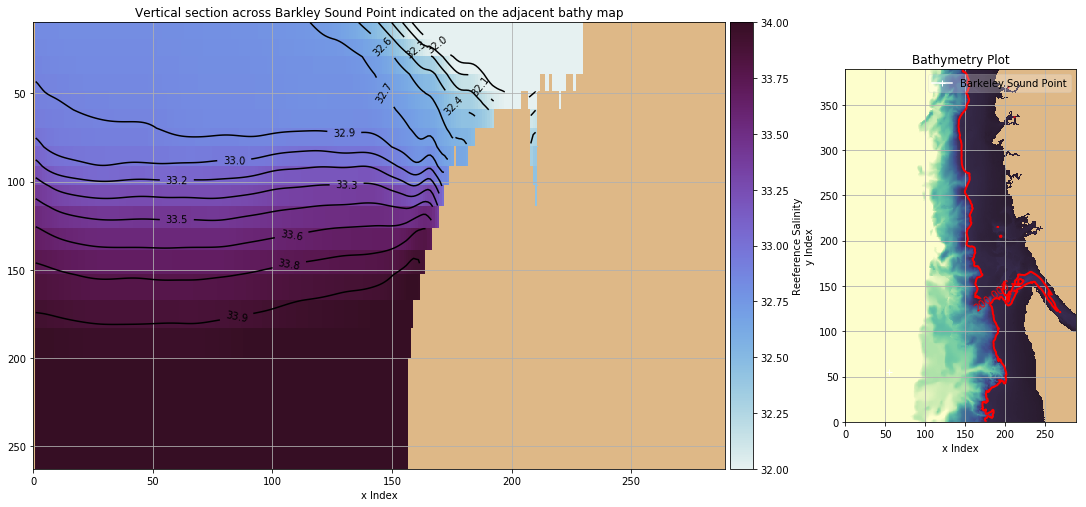

In [36]:
# Set up the figure and axes
fig, (axl, axcb, axr) = plt.subplots(1, 3, figsize=(16, 8))
land_colour = 'burlywood'
for ax in (axl, axr):
    ax.set_axis_bgcolor(land_colour)
axl.set_position((0.125, 0.125, 0.6, 0.775))
axcb.set_position((0.73, 0.125, 0.02, 0.775))
axr.set_position((0.83, 0.125, 0.2, 0.775))

# Plot thalweg points on bathymetry map
viz_tools.set_aspect(axr)
cmap = plt.get_cmap(cm.deep_r)
cmap.set_bad(land_colour)
# bathy = bathymetry
# x_slice = np.arange(bathy.shape[1])
# y_slice = np.arange(bathy.shape[0])
axr.pcolormesh(x_slice, y_slice, bathymetry, cmap=cmap)
axr.plot(
    x_slice[55], y_slice[55],
    linestyle='-', marker='+', color='white',
    label='Barkeley Sound Point',
)
legend = axr.legend(loc='best', fancybox=True, framealpha=0.25)
axr.set_title('Bathymetry Plot')
axr.set_xlabel('x Index')
axr.set_ylabel('y Index')
CS = axr.contour(x_slice,y_slice,bathymetry, levels = [200],
                 colors=('red',),linestyles=('-',),linewidths=(2,))


axr.clabel(CS)
axr.grid()

# Plot 24h average salinity at all depths along thalweg line
t = 47 
cmap = plt.get_cmap(cm.dense)
cmap.set_bad(land_colour)
sal_0 = sal[t, :20, :,:]
sal_tzyx = np.ma.masked_values(sal_0, 0)
x, z = np.meshgrid(x_slice, zlevels[:20])
mesh = axl.pcolormesh(x_slice, zlevels[:20], sal_tzyx[:20,225,x_slice], cmap=cmap, vmin=32, vmax=34)
cbar = plt.colorbar(mesh, cax=axcb)
cbar.set_label('Reeference Salinity')
clines = axl.contour(x_slice, zlevels[:20], sal_tzyx[:20,225,x_slice], np.arange(32, 34, 0.15), colors='black')
axl.clabel(clines, fmt='%1.1f', inline=True)
axl.invert_yaxis()
axl.set_xlabel('x Index')
# axl.set_ylabel('{0.long_name} [{0.units}]'.format(zlevels))
axl.grid()
axl.set_title('Vertical section across Barkley Sound Point indicated on the adjacent bathy map')

/home/ssahu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


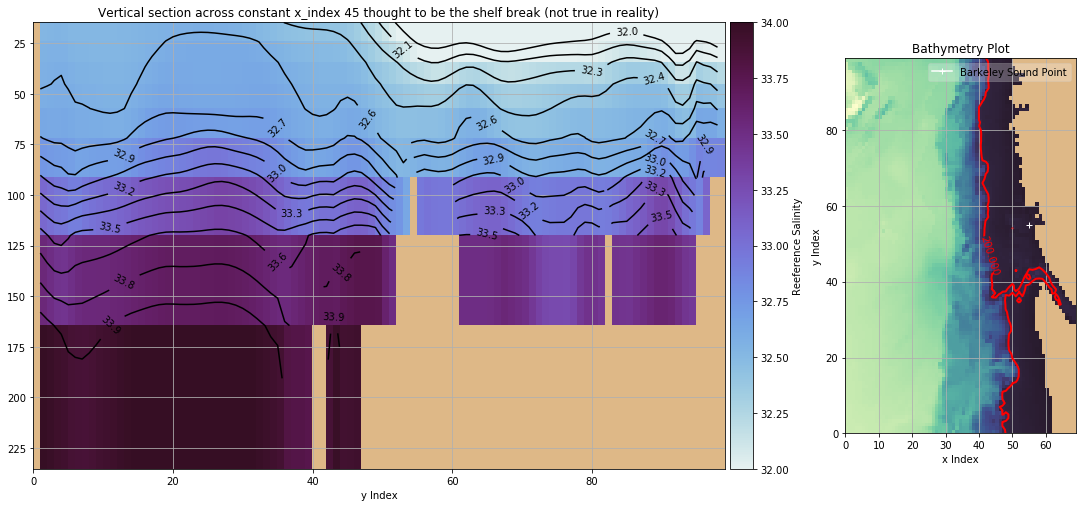

In [21]:
# Set up the figure and axes
fig, (axl, axcb, axr) = plt.subplots(1, 3, figsize=(16, 8))
land_colour = 'burlywood'
for ax in (axl, axr):
    ax.set_axis_bgcolor(land_colour)
axl.set_position((0.125, 0.125, 0.6, 0.775))
axcb.set_position((0.73, 0.125, 0.02, 0.775))
axr.set_position((0.83, 0.125, 0.2, 0.775))

# Plot thalweg points on bathymetry map
viz_tools.set_aspect(axr)
cmap = plt.get_cmap(cm.deep_r)
cmap.set_bad(land_colour)
# bathy = bathymetry
# x_slice = np.arange(bathy.shape[1])
# y_slice = np.arange(bathy.shape[0])
axr.pcolormesh(x_slice, y_slice, bathymetry, cmap=cmap)
axr.plot(
    x_slice[55], y_slice[55],
    linestyle='-', marker='+', color='white',
    label='Barkeley Sound Point',
)
legend = axr.legend(loc='best', fancybox=True, framealpha=0.25)
axr.set_title('Bathymetry Plot')
axr.set_xlabel('x Index')
axr.set_ylabel('y Index')
CS = axr.contour(x_slice,y_slice,bathymetry, levels = [200],
                 colors=('red',),linestyles=('-',),linewidths=(2,))


axr.clabel(CS)
axr.grid()

# Plot 24h average salinity at all depths along thalweg line
t = 47 
cmap = plt.get_cmap(cm.dense)
cmap.set_bad(land_colour)
sal_0 = sal[t, :10, :,:]
sal_tzyx = np.ma.masked_values(sal_0, 0)
x, z = np.meshgrid(x_slice, zlevels[:10])
mesh = axl.pcolormesh(y_slice, zlevels[:10], sal_tzyx[:10,y_slice,45], cmap=cmap, vmin=32, vmax=34)
cbar = plt.colorbar(mesh, cax=axcb)
cbar.set_label('Reeference Salinity')
clines = axl.contour(y_slice, zlevels[:10], sal_tzyx[:10,y_slice,45], np.arange(32, 34, 0.15), colors='black')
axl.clabel(clines, fmt='%1.1f', inline=True)
axl.invert_yaxis()
axl.set_xlabel('y Index')
# axl.set_ylabel('{0.long_name} [{0.units}]'.format(zlevels))
axl.grid()
axl.set_title('Vertical section across constant x_index 45 thought to be the shelf break (not true in reality)')

/home/ssahu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


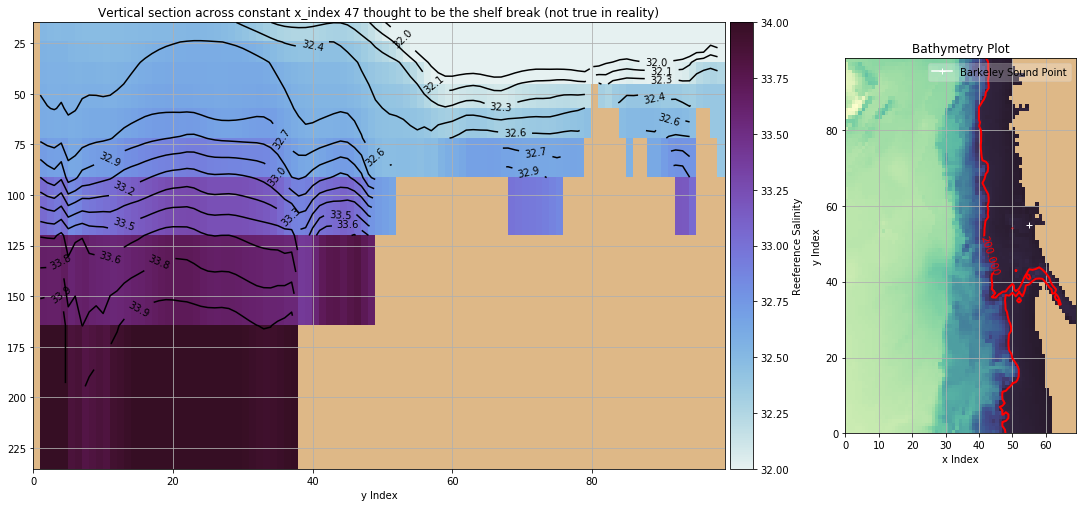

In [22]:
# Set up the figure and axes
fig, (axl, axcb, axr) = plt.subplots(1, 3, figsize=(16, 8))
land_colour = 'burlywood'
for ax in (axl, axr):
    ax.set_axis_bgcolor(land_colour)
axl.set_position((0.125, 0.125, 0.6, 0.775))
axcb.set_position((0.73, 0.125, 0.02, 0.775))
axr.set_position((0.83, 0.125, 0.2, 0.775))

# Plot thalweg points on bathymetry map
viz_tools.set_aspect(axr)
cmap = plt.get_cmap(cm.deep_r)
cmap.set_bad(land_colour)
# bathy = bathymetry
# x_slice = np.arange(bathy.shape[1])
# y_slice = np.arange(bathy.shape[0])
axr.pcolormesh(x_slice, y_slice, bathymetry, cmap=cmap)
axr.plot(
    x_slice[55], y_slice[55],
    linestyle='-', marker='+', color='white',
    label='Barkeley Sound Point',
)
legend = axr.legend(loc='best', fancybox=True, framealpha=0.25)
axr.set_title('Bathymetry Plot')
axr.set_xlabel('x Index')
axr.set_ylabel('y Index')
CS = axr.contour(x_slice,y_slice,bathymetry, levels = [200],
                 colors=('red',),linestyles=('-',),linewidths=(2,))


axr.clabel(CS)
axr.grid()

# Plot 24h average salinity at all depths along thalweg line
t = 47 
cmap = plt.get_cmap(cm.dense)
cmap.set_bad(land_colour)
sal_0 = sal[t, :10, :,:]
sal_tzyx = np.ma.masked_values(sal_0, 0)
x, z = np.meshgrid(x_slice, zlevels[:10])
mesh = axl.pcolormesh(y_slice, zlevels[:10], sal_tzyx[:10,y_slice,47], cmap=cmap, vmin=32, vmax=34)
cbar = plt.colorbar(mesh, cax=axcb)
cbar.set_label('Reeference Salinity')
clines = axl.contour(y_slice, zlevels[:10], sal_tzyx[:10,y_slice,47], np.arange(32, 34, 0.15), colors='black')
axl.clabel(clines, fmt='%1.1f', inline=True)
axl.invert_yaxis()
axl.set_xlabel('y Index')
# axl.set_ylabel('{0.long_name} [{0.units}]'.format(zlevels))
axl.grid()
axl.set_title('Vertical section across constant x_index 47 thought to be the shelf break (not true in reality)')